In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.manifold import Isomap

from hades import misc
from hades import Hades, hp_grid

In [2]:
def load_cyclo_from_mat():
    X = loadmat('internal_data/cyclo_octane.mat')["pointsCycloOctane"]
    reducer_isomap = Isomap(n_neighbors = 60, n_components = 3)
    X_3d = reducer_isomap.fit_transform(X)
    X_3d = adjust_cyclo(X_3d)

    # Plot
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(X_3d.T[0], X_3d.T[1], X_3d.T[2], s = 1)

    np.save('data/cyclo_octane', X)
    np.save('data/cyclo_octane_Isomap', X_3d)

In [3]:
def adjust_cyclo(X_3d, t1 = -60, t2 = 0):
    angle1 = np.pi * (t1 / 180)
    angle2 = np.pi * (t2 / 180)
    
    cos1 = np.cos(angle1)
    sin1 = np.sin(angle1)
    rotmat1 = np.array([[cos1, sin1, 0],[-sin1, cos1, 0],[0,0,1]])
    cos2 = np.cos(angle2)
    sin2 = np.sin(angle2)
    rotmat2 = np.array([[1,0,0],[0,cos2, sin2],[0,-sin2,cos2]])
    
    return X_3d @ rotmat2 @ rotmat1

In [4]:
def show_cyclo_both(X3, filt, fig_name = 'untitled', t1 = 0, t2 = 0):
    X3f = X3[filt]
    
    X3 = misc.rotate_3d(X3, t_x=t2, t_z=t1)
    X3f = misc.rotate_3d(X3f, t_x=t2, t_z=t1)
    
    #X3 = adjust_cyclo(X3, t1, t2)
    #X3f = adjust_cyclo(X3f, t1, t2)

    fig = plt.figure()
    fig.set_size_inches(5, 10)
    ax1 = fig.add_subplot(211, projection ='3d')
    ax2 = fig.add_subplot(212, projection ='3d')
    ax1.scatter(X3.T[0], X3.T[1], X3.T[2], s = 1.5, alpha = 0.4, c = 'gray', zorder = 0)
    ax2.scatter(X3f.T[0], X3f.T[1], X3f.T[2], s = 5, alpha = 1, c = 'blue', zorder = 100)

    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_zticks([])

    # ax1.set_title('Cyclo-octane \n Entire Data', fontsize = 18, y = 1.06)
    # ax2.set_title('Cyclo-octane \n Singularities', fontsize = 18, y = 1.06)
    plt.savefig('output/' + fig_name + '.pdf')

# Cyclo-octane

In [5]:
# Load data
X = np.load('data/cyclo_octane.npy')
X3 = np.load('data/cyclo_octane_Isomap.npy')

In [6]:
# Fit data to classifier
clf = Hades()
hp = hp_grid(r=0.35, pca_thr=0.95)
clf.fit(X, hp=hp, verbose=True)
# clf.fit(X)
print(f'Time taken = {round(clf.fit_time, 2)} seconds')

Updated 6pm 7Oct
Computing balltree for the current batch of hyperparameters...
Starting a multi-thread run.
Running (ker_alpha, pca_thr, r) = (0.5, 0.95, 0.35)
Recomputing balltree...
Unneccesary to recompute
done with (ker_alpha, pca_thr, r) = (0.5, 0.95, 0.35)
Filtering and scoring output...
ind_decr = 0
knee = 0.6789540882183327, knee_ind = 5
SUPC Peak value = 0.5290372958150855
MH True at hp={'ker_alpha': 0.5, 'pca_thr': 0.95, 'r': 0.35}
done.
The data seems to be sampled from a manifold!
Time taken = 5.38
Time taken = 5.38 seconds


In [7]:
# Get output
y = clf.predict(X, use_manifold_hypothesis=False)
s = clf.score_samples(X)

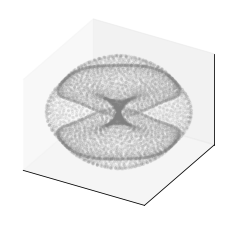

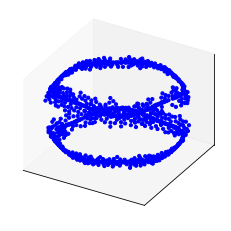

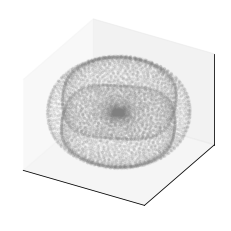

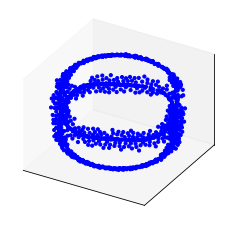

In [8]:
viewing_angles = [(0, 0), (40, 30)]  # Also good: (23, -25), (40, 65)
for i, (t1, t2) in enumerate(viewing_angles):
    misc.plot(adjust_cyclo(X3, t1=t1, t2=t2), s=5, alpha=0.1, c='gray')
    plt.savefig(f'Cyclo_all_view{i}.pdf')
    plt.show()
    
    misc.plot(adjust_cyclo(X3[y], t1=t1, t2=t2), s=10, alpha=1.0, c='blue')
    plt.savefig(f'Cyclo_filt_view{i}.pdf')
    plt.show()